In [1211]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [1212]:
edx_orig = pd.read_csv('edx_courses.csv')
edx_orig.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [1213]:
edx_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [1283]:
edx_orig['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 975 entries, 0 to 974
Series name: price
Non-Null Count  Dtype 
--------------  ----- 
975 non-null    object
dtypes: object(1)
memory usage: 7.7+ KB


In [1215]:
edx_orig['price'].value_counts()

FREE-Add a Verified Certificate for $49 USD        270
FREE-Add a Verified Certificate for $99 USD        137
FREE-Add a Verified Certificate for $50 USD         96
FREE-Add a Verified Certificate for $199 USD        85
FREE-Add a Verified Certificate for $149 USD        78
FREE-Add a Verified Certificate for $25 USD         49
FREE-Add a Verified Certificate for $139 USD        33
FREE-Add a Verified Certificate for $150 USD        30
FREE-Add a Verified Certificate for $249 USD        26
FREE-Add a Verified Certificate for $79 USD         21
FREE-Add a Verified Certificate for $169 USD        19
FREE-Add a Verified Certificate for $29 USD         15
FREE-Add a Verified Certificate for $39 USD         13
FREE-Add a Verified Certificate for $299 USD         9
FREE-Add a Verified Certificate for $129 USD         9
FREE-Add a Verified Certificate for $125 USD         8
FREE-Add a Verified Certificate for $5 USD           7
FREE-Add a Verified Certificate for $59 USD          7
FREE-Add a

In [1216]:
edx_orig.isnull().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

In [1217]:
edx_orig.duplicated().sum()

1

In [1218]:
edx_wo_dups = edx_orig.drop_duplicates()

In [1219]:
edx_wo_dups['n_enrolled'] = edx_wo_dups['n_enrolled'].str.replace(',','')

/tmp/ipykernel_119207/975393069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_wo_dups['n_enrolled'] = edx_wo_dups['n_enrolled'].str.replace(',','')


In [1220]:
null_enrolled= edx_wo_dups['n_enrolled'].isna()

In [1221]:
edx_wo_null_enrolled = edx_wo_dups[null_enrolled]

In [1222]:
edx_wo_null_enrolled

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
13,English Grammar and Style,Learn key concepts and strategies in grammar a...,NaN,Instructor-led on a course schedule,The University of Queensland,Roslyn Petelin,Introductory,Humanities,English,English,3–4 hours per week,8 Weeks,FREE-Add a Verified Certificate for $99 USD,With the rise of social media and the Internet...,"In Week 1 , we'll introduce you to the course ...",https://www.edx.org/course/english-grammar-and...
459,Business Communication,Learn how to effectively communicate and build...,NaN,Self-paced on your time,Rochester Institute of Technology,Andrea Hickerson-Keri Barone,Introductory,Communication,English,English,4–6 hours per week,3 Weeks,FREE-Add a Verified Certificate for $199 USD,Business communication is vital to professiona...,NaN,https://www.edx.org/course/business-communicat...
462,Agua 2.0: empresas eficientes para el siglo XXI,El curso te presenta una visión integral de la...,NaN,Self-paced on your time,Inter-American Development Bank,Sergio Campos-Corinne Cathala-Federico Pérez,Introductory,Business & Management,Español,Español,2–3 hours per week,8 Weeks,FREE-Add a Verified Certificate for $25 USD,¿Eres un profesional o actor activo del sector...,Módulo 1 - Las empresas de agua y saneamiento ...,https://www.edx.org/course/agua-20-empresas-ef...
494,Introduction to Cloud Computing,"Master the core concepts in Cloud Computing, f...",NaN,Self-paced on your time,IBM,Rav Ahuja,Introductory,Computer Science,English,English,1–2 hours per week,6 Weeks,FREE-Add a Verified Certificate for $49 USD,This course introduces you to the core concept...,Module 1: Overview of Cloud ComputingModule 2:...,https://www.edx.org/course/introduction-to-clo...
502,SQL aplicado en la ciencia de datos,Aprende a usar y aplicar el poderoso lenguaje ...,NaN,Self-paced on your time,IBM,Rav Ahuja,Introductory,Data Analysis & Statistics,Español,Español,2–4 hours per week,4 Weeks,FREE-Add a Verified Certificate for $39 USD,Gran parte de los datos del mundo viven en bas...,NaN,https://www.edx.org/course/sql-aplicado-en-la-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,Drones and Autonomous Systems 2: Applications ...,Learn the latest applications of unmanned aeri...,NaN,Self-paced on your time,University of Maryland Global Campus-Universit...,"Brian Powers, M.A.",Intermediate,Science,English,English,2–3 hours per week,6 Weeks,FREE-Add a Verified Certificate for $149 USD,If you want to be the technology specialist wh...,"Week 1: Introduction to hazards, disasters and...",https://www.edx.org/course/drones-and-autonomo...
968,MathTrackX: Differential Calculus,Discover concepts and techniques relating to d...,NaN,Self-paced on your time,University of Adelaide,Dr Melissa Humphries-Dr Danny Stevenson-Dr Dav...,Introductory,Math,English,English,3–6 hours per week,4 Weeks,FREE-Add a Verified Certificate for $79 USD,This course is part three of the MathTrackX XS...,NaN,https://www.edx.org/course/mathtrackx-differen...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...


In [1223]:
edx_wo_null_enrolled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 13 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               120 non-null    object
 1   summary             116 non-null    object
 2   n_enrolled          0 non-null      object
 3   course_type         120 non-null    object
 4   institution         120 non-null    object
 5   instructors         120 non-null    object
 6   Level               120 non-null    object
 7   subject             120 non-null    object
 8   language            120 non-null    object
 9   subtitles           120 non-null    object
 10  course_effort       120 non-null    object
 11  course_length       120 non-null    object
 12  price               120 non-null    object
 13  course_description  113 non-null    object
 14  course_syllabus     54 non-null     object
 15  course_url          120 non-null    object
dtypes: object(16)
memory usag

In [1224]:
edx_wo_null_enrolled['institution'].unique

<bound method Series.unique of 13                          The University of Queensland
459                    Rochester Institute of Technology
462                      Inter-American Development Bank
494                                                  IBM
502                                                  IBM
                             ...                        
967    University of Maryland Global Campus-Universit...
968                               University of Adelaide
970                      Inter-American Development Bank
971                                  Tsinghua University
974                               University of Adelaide
Name: institution, Length: 120, dtype: object>

In [1225]:
edx_wo_null_enrolled['price'].unique

<bound method Series.unique of 13      FREE-Add a Verified Certificate for $99 USD
459    FREE-Add a Verified Certificate for $199 USD
462     FREE-Add a Verified Certificate for $25 USD
494     FREE-Add a Verified Certificate for $49 USD
502     FREE-Add a Verified Certificate for $39 USD
                           ...                     
967    FREE-Add a Verified Certificate for $149 USD
968     FREE-Add a Verified Certificate for $79 USD
970     FREE-Add a Verified Certificate for $25 USD
971    FREE-Add a Verified Certificate for $139 USD
974     FREE-Add a Verified Certificate for $79 USD
Name: price, Length: 120, dtype: object>

In [1284]:
edx_wo_dups['certification_value'] = edx_wo_dups['price'].str.replace(r'\D', '').astype(int)
edx_wo_dups['certification_value']


/tmp/ipykernel_119207/4156292513.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  edx_wo_dups['certification_value'] = edx_wo_dups['price'].str.replace(r'\D', '').astype(int)
/tmp/ipykernel_119207/4156292513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_wo_dups['certification_value'] = edx_wo_dups['price'].str.replace(r'\D', '').astype(int)


0       49
1       49
2       90
3      199
4      249
      ... 
970     25
971    139
972    139
973     25
974     79
Name: certification_value, Length: 974, dtype: int64

In [1227]:
edx_wo_dups

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,certification_value
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online,49
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...,49
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...,90
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge,199
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...,25
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...,139
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...,139
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,8775,Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ...",Module 1: Introduction to 

In [1228]:
edx_wo_null_enrolled['certification_value'] = edx_wo_null_enrolled['price'].str.replace(r'\D', '').astype(int)
edx_wo_null_enrolled['certification_value']

/tmp/ipykernel_119207/1843453504.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  edx_wo_null_enrolled['certification_value'] = edx_wo_null_enrolled['price'].str.replace(r'\D', '').astype(int)
/tmp/ipykernel_119207/1843453504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_wo_null_enrolled['certification_value'] = edx_wo_null_enrolled['price'].str.replace(r'\D', '').astype(int)


13      99
459    199
462     25
494     49
502     39
      ... 
967    149
968     79
970     25
971    139
974     79
Name: certification_value, Length: 120, dtype: int64

In [1229]:
edx_wo_null_enrolled.head(1)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,certification_value
13,English Grammar and Style,Learn key concepts and strategies in grammar a...,NaN,Instructor-led on a course schedule,The University of Queensland,Roslyn Petelin,Introductory,Humanities,English,English,3–4 hours per week,8 Weeks,FREE-Add a Verified Certificate for $99 USD,With the rise of social media and the Internet...,"In Week 1 , we'll introduce you to the course ...",https://www.edx.org/course/english-grammar-and...,99


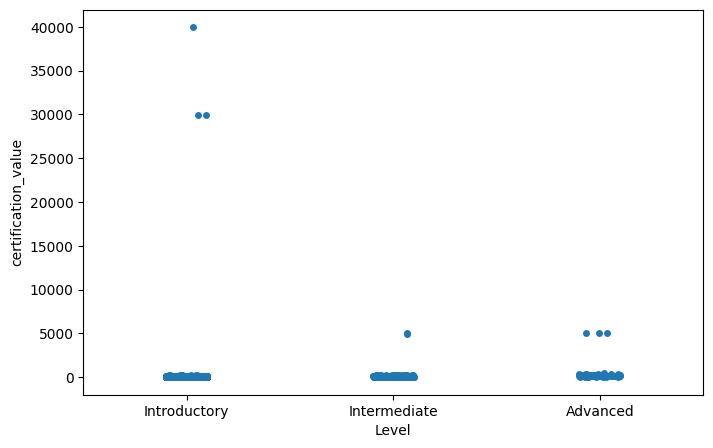

In [1230]:
sns.stripplot(data=edx_wo_dups, x="Level", y="certification_value")
plt.gcf().set_size_inches(8, 5)

In [1231]:
edx_wo_dups['certification_value'].value_counts()

49       270
99       136
50        96
199       85
149       78
25        49
139       33
150       30
249       26
79        21
169       19
29        15
39        13
299        9
129        9
125        8
5          7
59         7
75         5
4999       4
90         4
119        3
214        3
250        3
60         3
350        3
70         3
300        3
225        3
100        3
19         2
65         2
40         2
29970      2
179        2
399        2
39960      1
4990       1
166        1
375        1
159        1
450        1
69         1
10         1
200        1
15         1
30         1
Name: certification_value, dtype: int64

Identifico outliers

In [1232]:
edx_wo_dups['z_score']=stats.zscore(edx_wo_dups['certification_value'])
edx_wo_dups['z_score']

/tmp/ipykernel_119207/3721363799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_wo_dups['z_score']=stats.zscore(edx_wo_dups['certification_value'])


0     -0.094358
1     -0.094358
2     -0.072673
3     -0.015023
4      0.011422
         ...   
970   -0.107051
971   -0.046757
972   -0.046757
973   -0.107051
974   -0.078491
Name: z_score, Length: 974, dtype: float64

In [1233]:
edx_wo_outliers= edx_wo_dups.loc[edx_wo_dups['z_score'].abs()<=2]


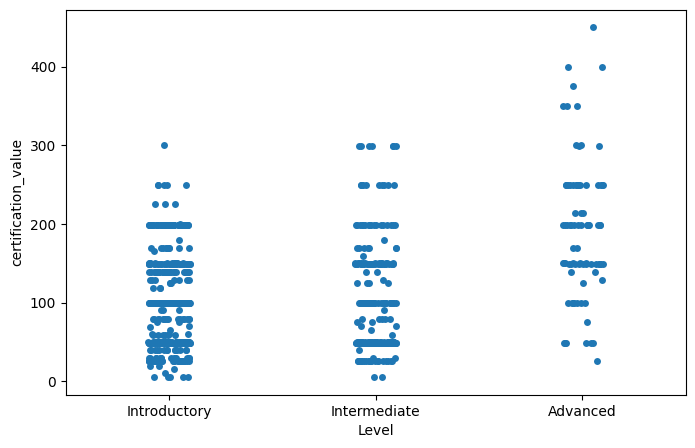

In [1234]:
sns.stripplot(data= edx_wo_outliers, x="Level", y="certification_value")
plt.gcf().set_size_inches(8, 5)

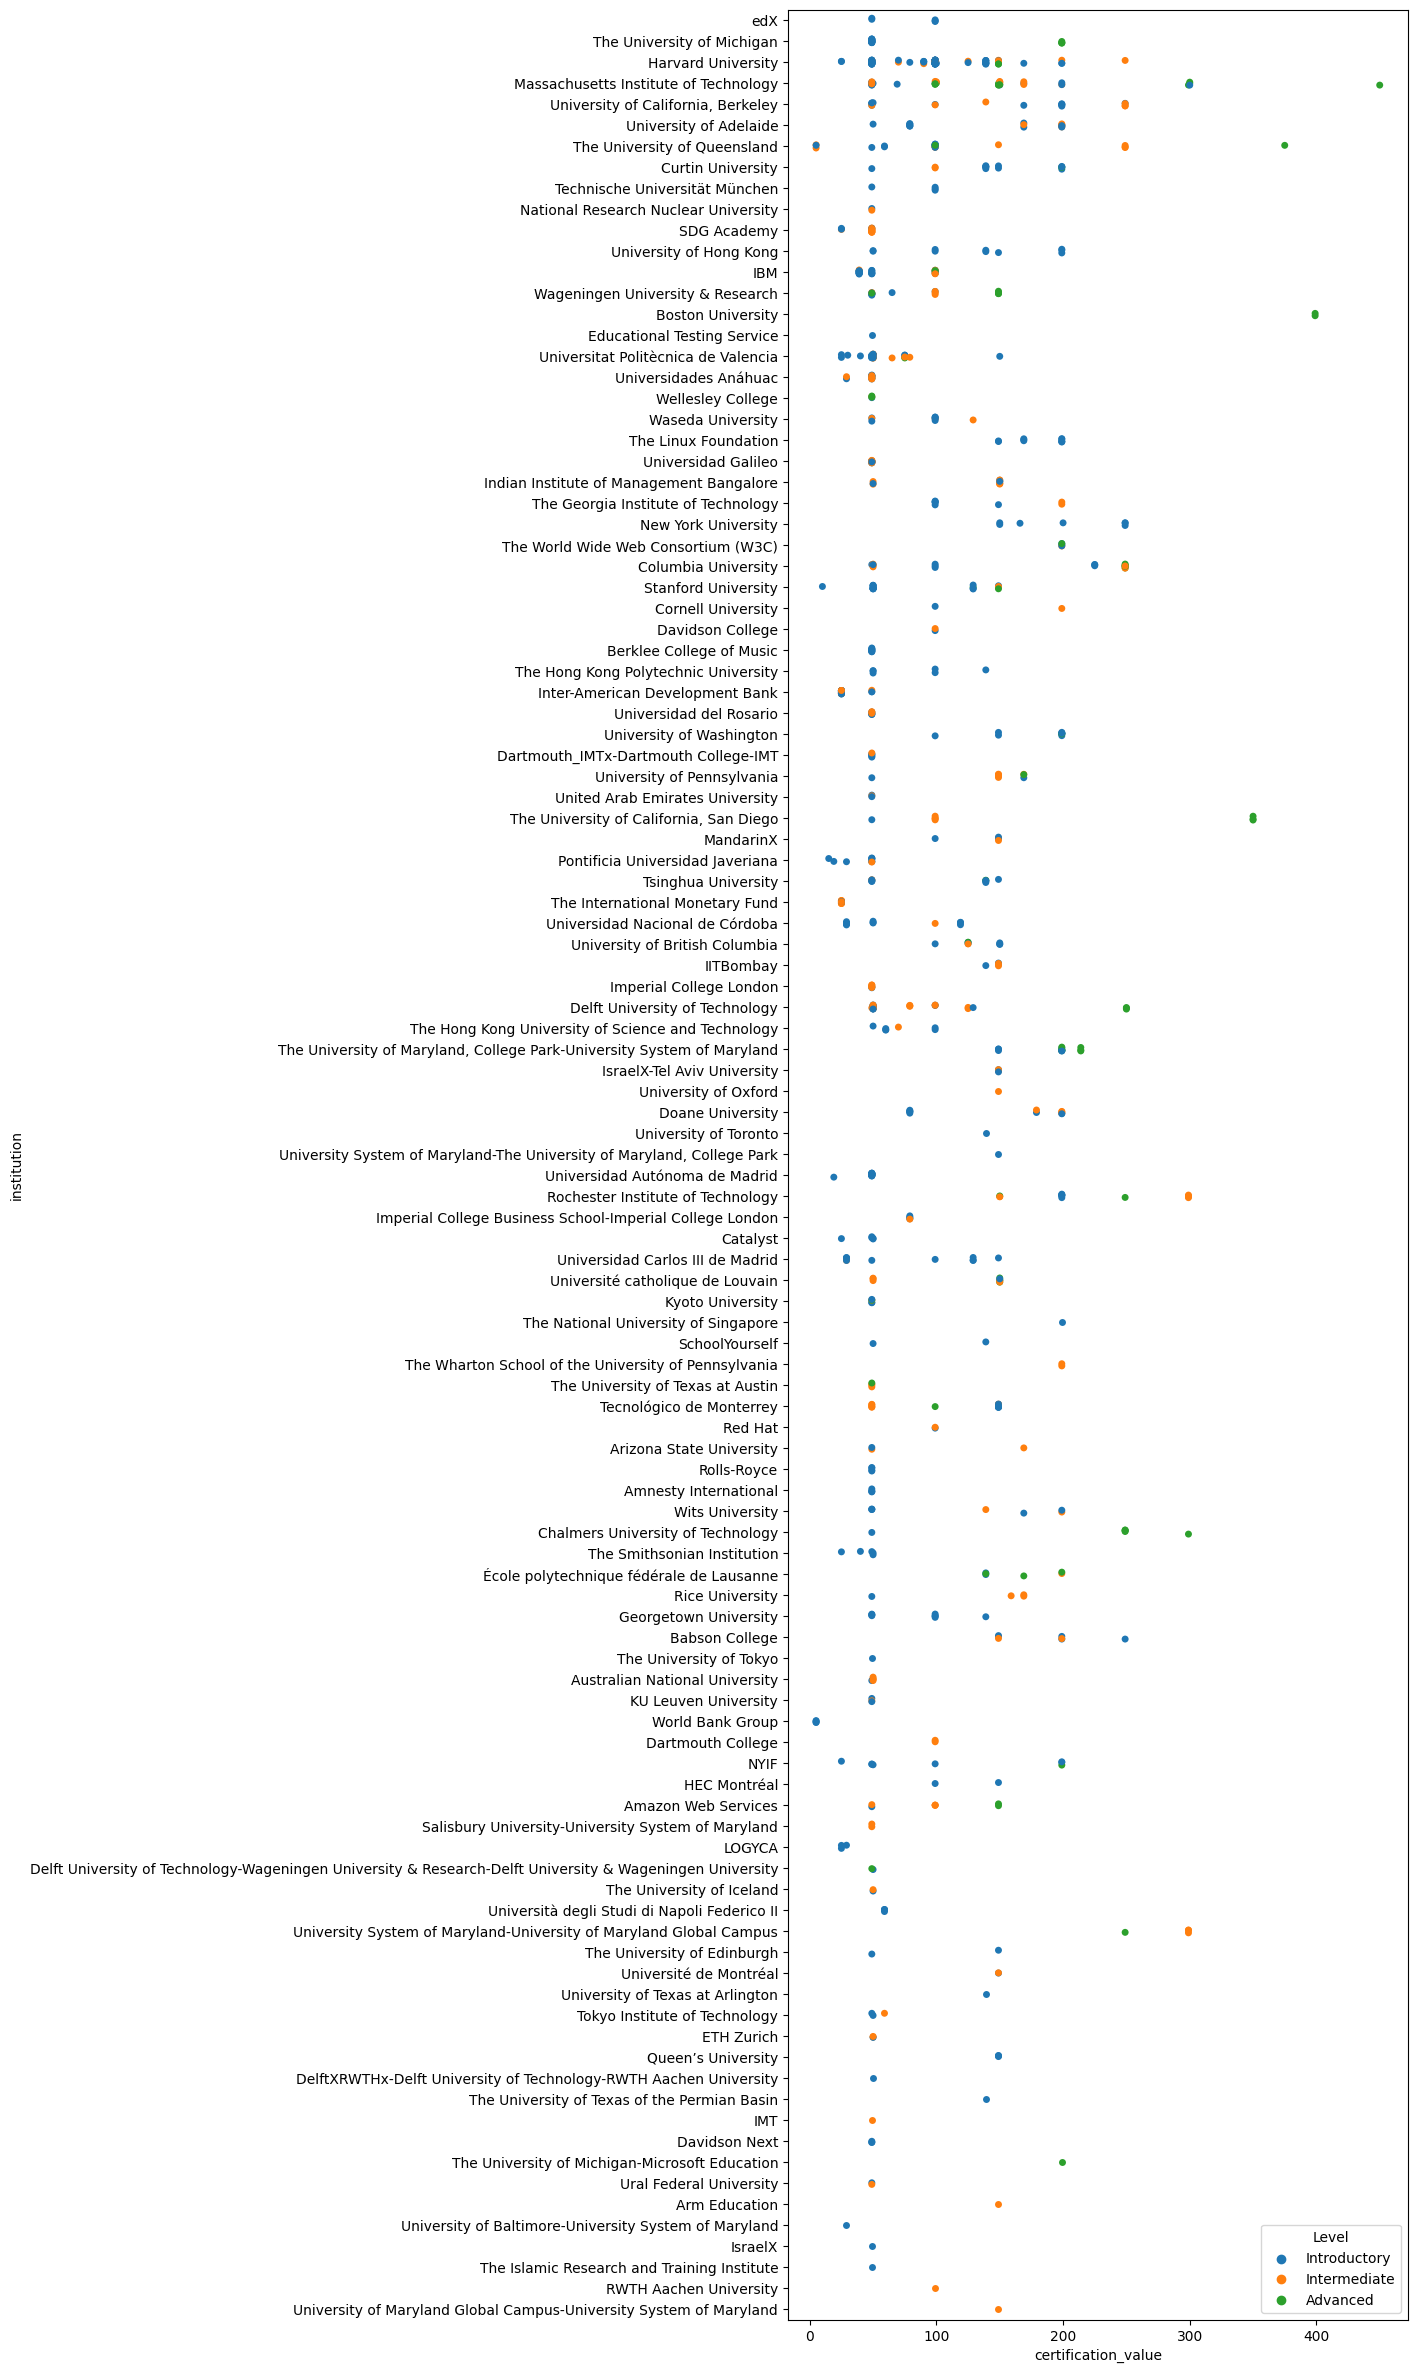

In [1235]:
sns.stripplot(data=edx_wo_outliers, x="certification_value", y="institution", hue= 'Level')
plt.gcf().set_size_inches(8, 30)

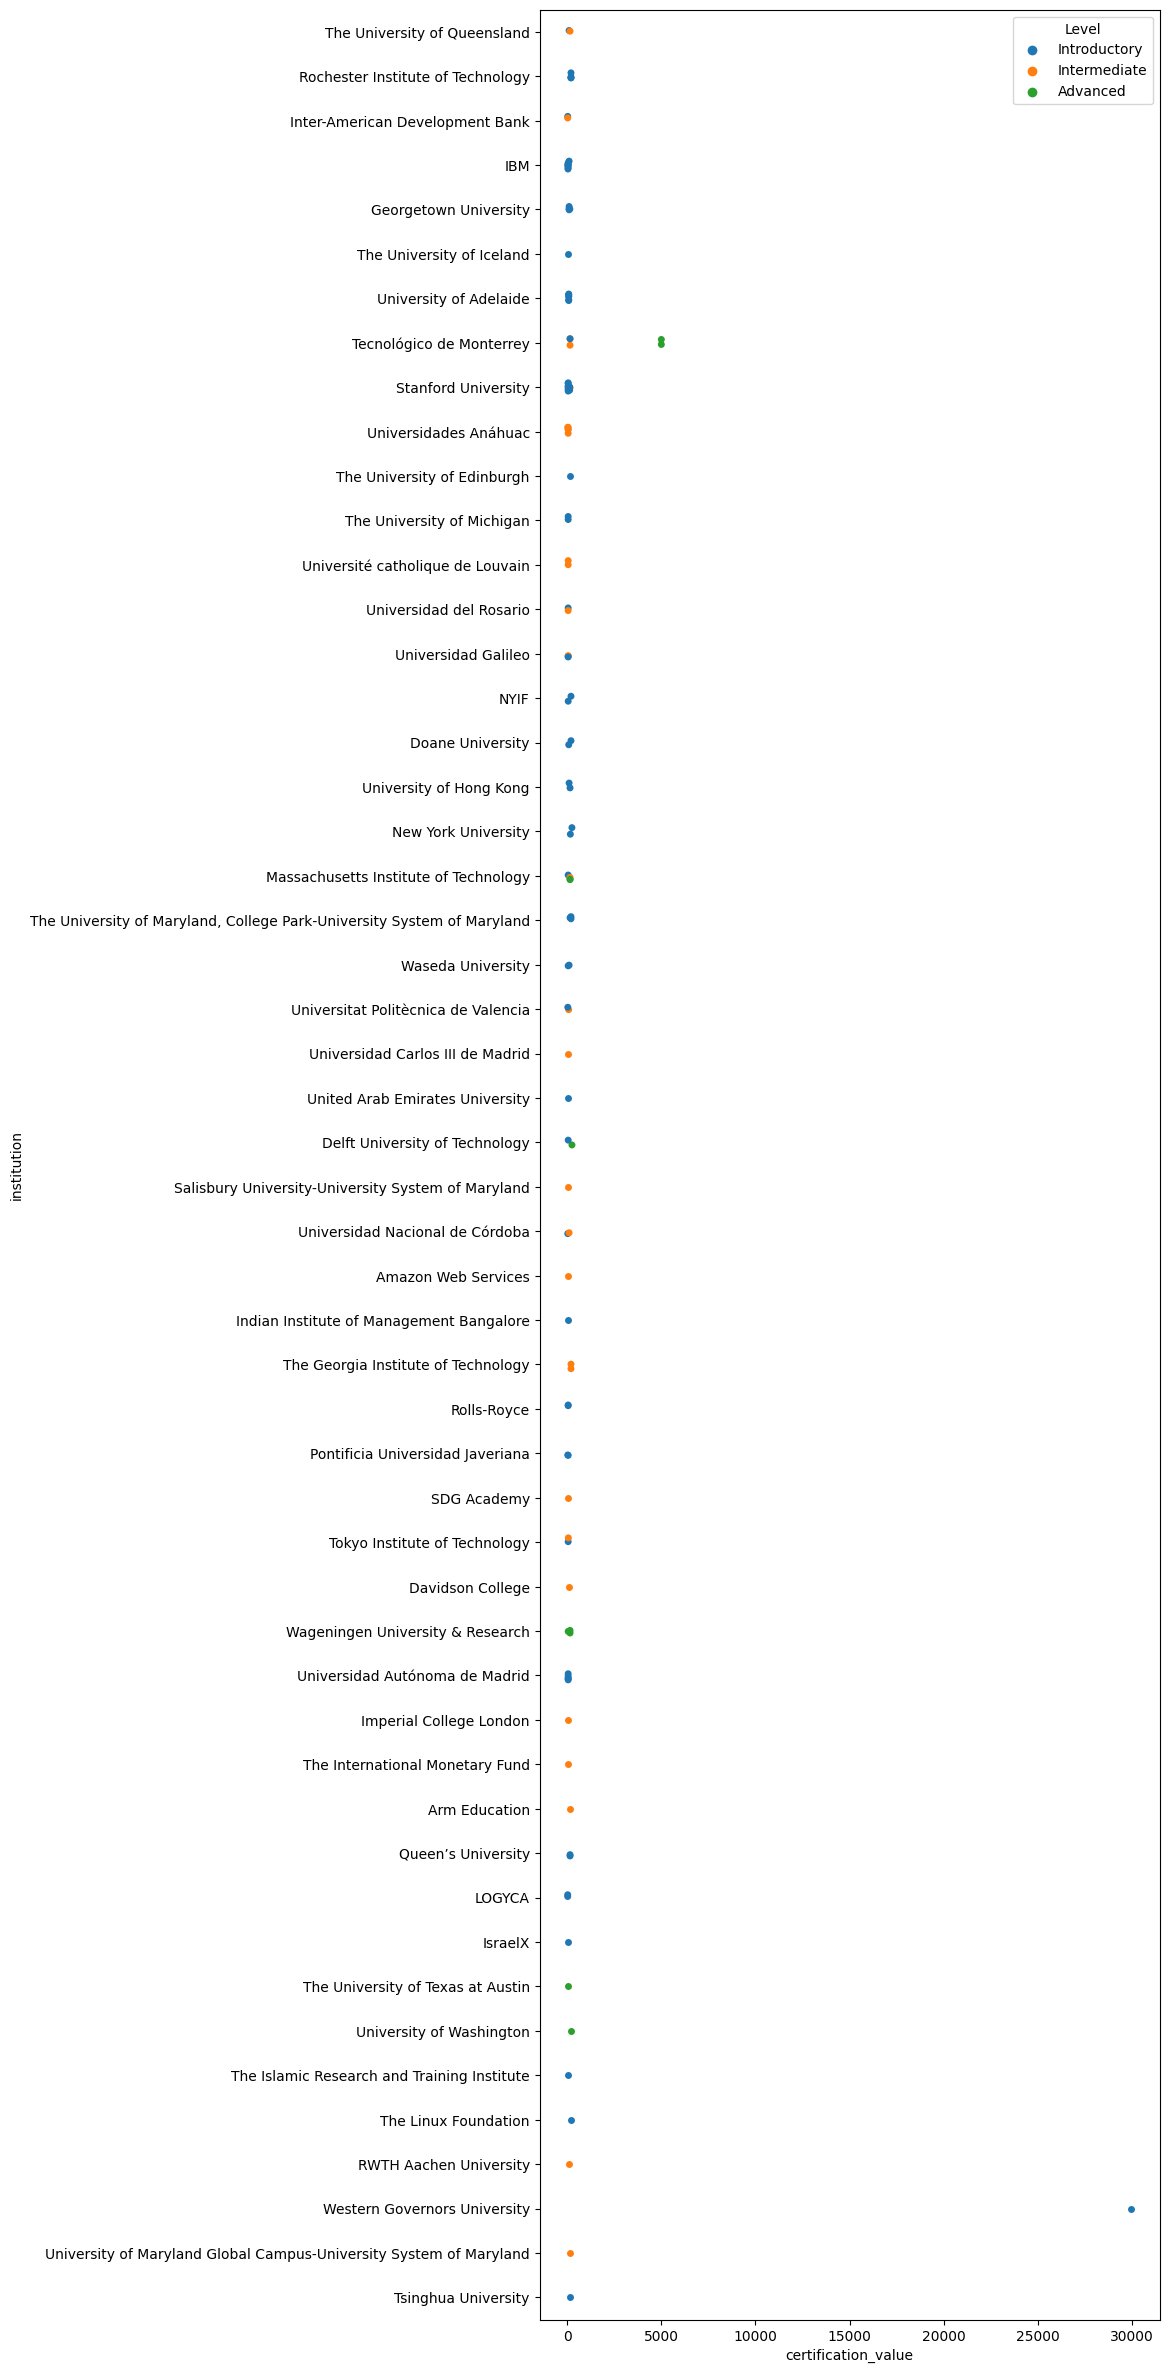

In [1236]:
sns.stripplot(data=edx_wo_null_enrolled, x="certification_value", y="institution", hue='Level')
plt.gcf().set_size_inches(8, 30)

In [1237]:
edx_wo_null_enrolled['z_score']=stats.zscore(edx_wo_null_enrolled['certification_value'])
edx_wo_null_enrolled['z_score']

/tmp/ipykernel_119207/3470641487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_wo_null_enrolled['z_score']=stats.zscore(edx_wo_null_enrolled['certification_value'])


13    -0.116065
459   -0.080110
462   -0.142673
494   -0.134043
502   -0.137639
         ...   
967   -0.098088
968   -0.123257
970   -0.142673
971   -0.101683
974   -0.123257
Name: z_score, Length: 120, dtype: float64

In [1238]:
edx_wo_outliers_and_wo_null_enrolled = edx_wo_null_enrolled.loc[edx_wo_null_enrolled['z_score'].abs()<=3]

In [1239]:
edx_wo_outliers_and_wo_null_enrolled['z_score'].value_counts()

-0.134043    33
-0.098088    16
-0.133684    13
-0.080110    12
-0.116065    10
-0.123257     7
-0.142673     6
-0.141235     4
-0.137639     4
-0.105279     3
 1.645771     2
-0.101683     2
-0.091975     1
-0.124695     1
-0.061772     1
-0.130448     1
-0.097728     1
-0.062132     1
-0.140875     1
Name: z_score, dtype: int64

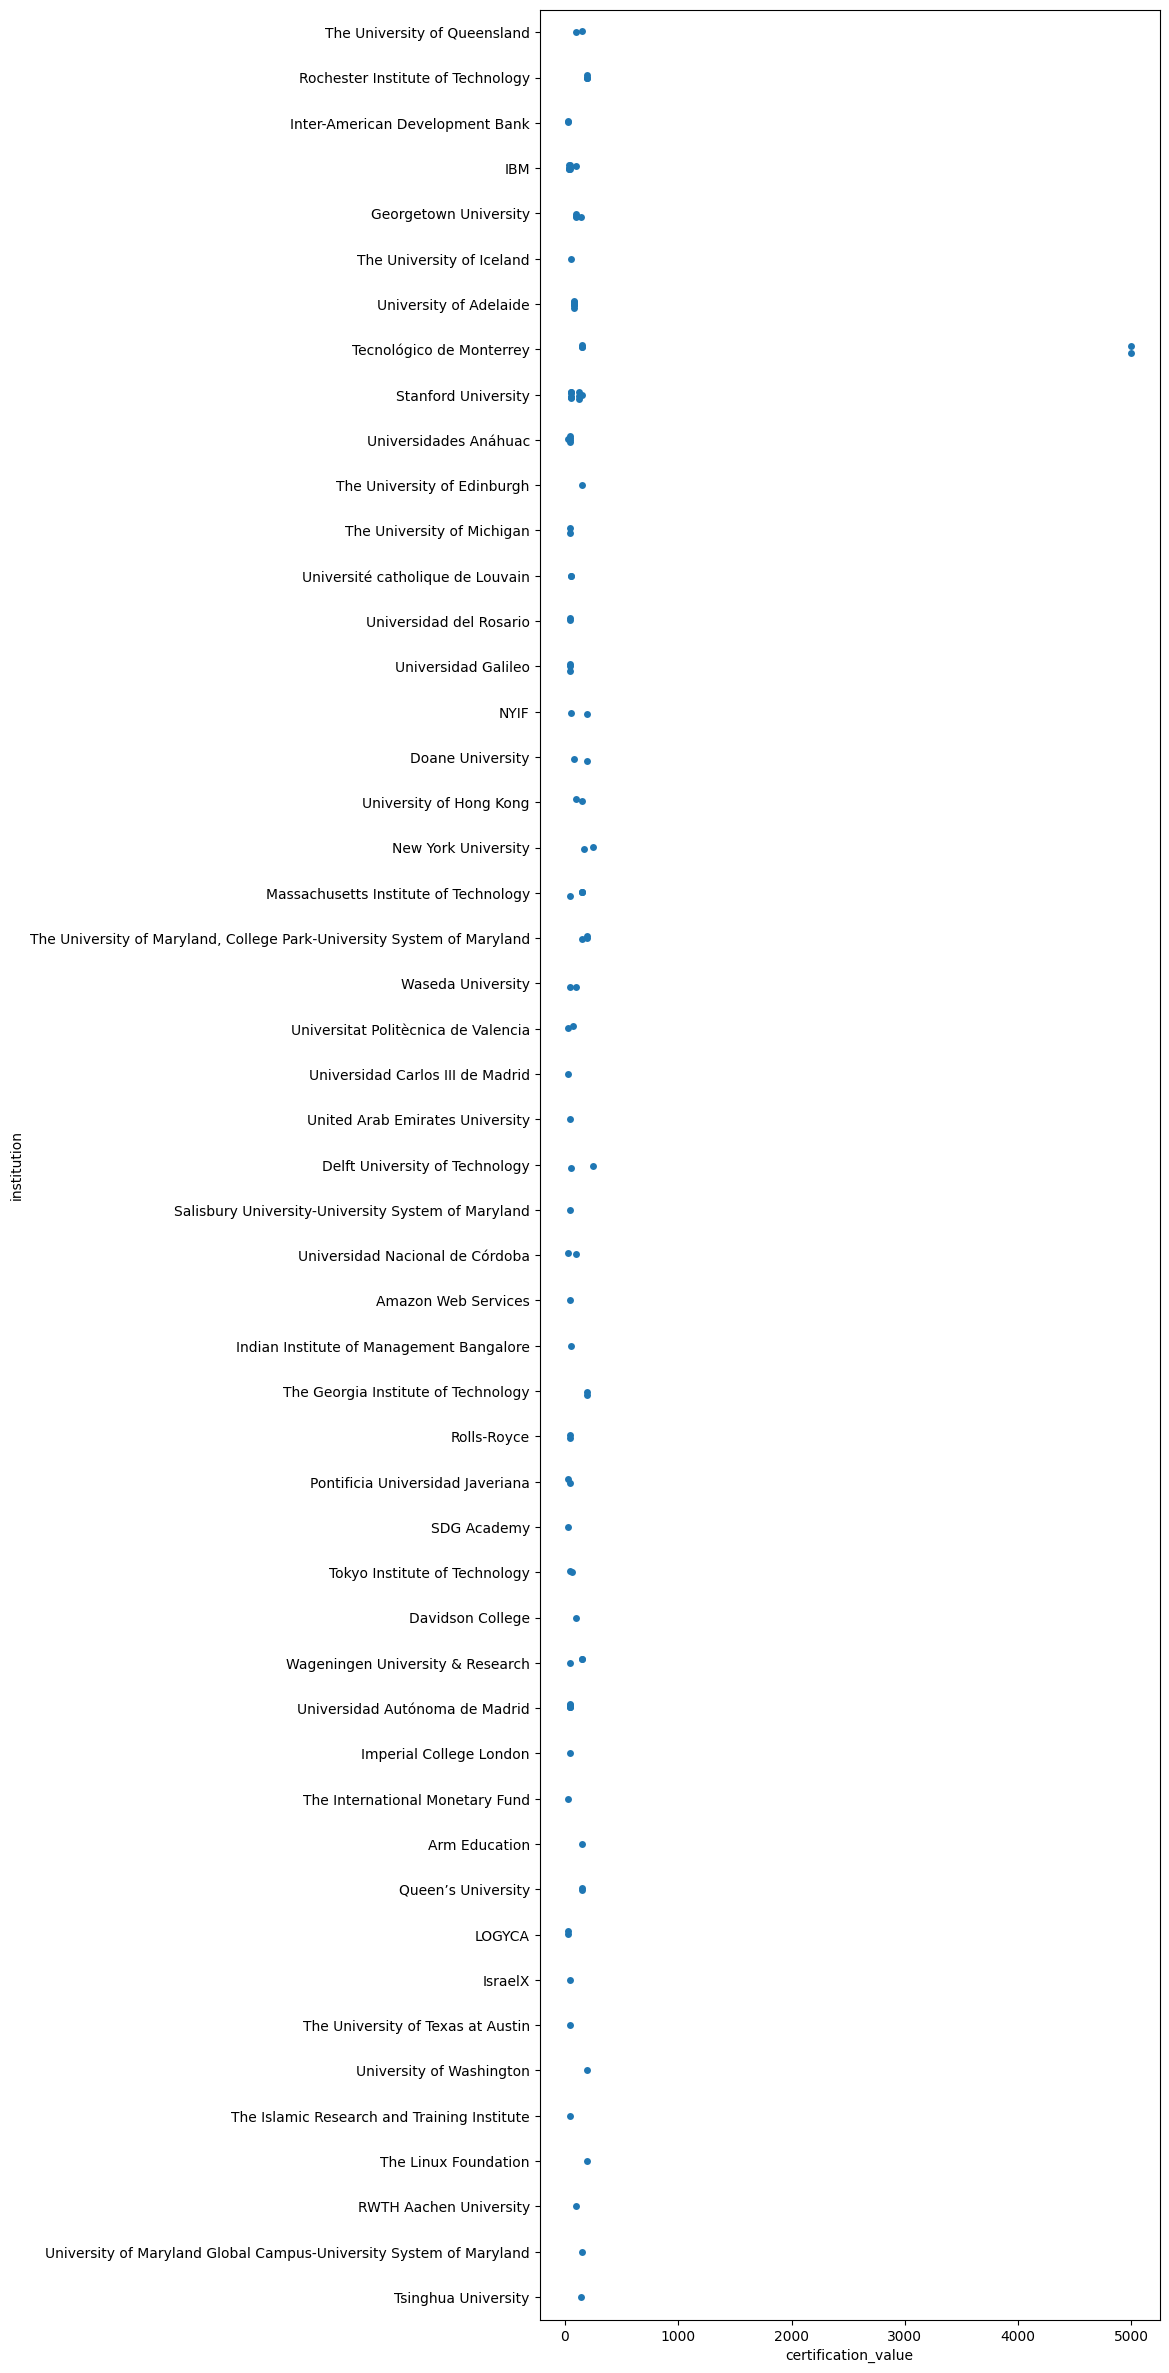

In [1240]:
sns.stripplot(data=edx_wo_outliers_and_wo_null_enrolled, x="certification_value", y="institution")
plt.gcf().set_size_inches(8, 30)

In [1241]:
edx_wo_outliers_and_wo_null_enrolled.median()

/tmp/ipykernel_119207/1771324828.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  edx_wo_outliers_and_wo_null_enrolled.median()


n_enrolled                   NaN
certification_value    50.000000
z_score                -0.133684
dtype: float64

In [1242]:
edx_wo_outliers_and_wo_null_enrolled.mean()

/tmp/ipykernel_119207/2481097248.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  edx_wo_outliers_and_wo_null_enrolled.mean()


n_enrolled                    NaN
certification_value    173.495798
z_score                 -0.089280
dtype: float64

In [1243]:
edx_wo_outliers

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,certification_value,z_score
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online,49,-0.094358
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...,49,-0.094358
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...,90,-0.072673
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge,199,-0.015023
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...,249,0.011422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...,25,-0.107051
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...,139,-0.046757
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...,139,-0.046757
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,8775,Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate

In [1244]:
edx_wo_outliers['language'].value_counts()

English          772
Español          172
Français           7
Italiano           4
中文                 4
Português          4
日本語                1
اللغة العربية      1
Deutsch            1
Name: language, dtype: int64

In [1245]:
edx_wo_outliers_and_wo_null_enrolled['language'].value_counts()

English          82
Español          33
Português         1
اللغة العربية     1
Français          1
中文                1
Name: language, dtype: int64

In [1246]:
edx_wo_outliers['title'].value_counts()

Marketing Management                                                              2
Introduction to Marketing                                                         2
How to Learn Online                                                               1
The Threat of Nuclear Terrorism                                                   1
Diseño de sistemas de información gerencial para intranet con Microsoft Access    1
                                                                                 ..
Agile Leadership Principles and Practices                                         1
How to Code: Simple Data                                                          1
Cybersecurity and Privacy in the IoT                                              1
Strategic Management                                                              1
MathTrackX: Special Functions                                                     1
Name: title, Length: 964, dtype: int64

In [1247]:
edx_wo_outliers_and_wo_null_enrolled['title'].value_counts()

English Grammar and Style                                          1
Internet de las cosas (IoT) y Big Data                             1
Sales Enablement & Analytics                                       1
Know HBV And HCV                                                   1
Gestión de compras eficientes para tu empresa                      1
                                                                  ..
Culture and Law: The East Asian Perspective                        1
Achieving Product-Market Fit                                       1
Sign Language Science: Factors Contributing to Natural Learning    1
Sorting Truth From Fiction: Civic Online Reasoning                 1
MathTrackX: Special Functions                                      1
Name: title, Length: 119, dtype: int64

In [1248]:
edx_wo_outliers[['title','language', 'n_enrolled', 'subject','course_type']]

,title,language,n_enrolled,subject,course_type
0,How to Learn Online,English,124980,Education & Teacher Training,Self-paced on your time
1,Programming for Everybody (Getting Started wit...,English,293864,Computer Science,Self-paced on your time
2,CS50's Introduction to Computer Science,English,2442271,Computer Science,Self-paced on your time
3,The Analytics Edge,English,129555,Data Analysis & Statistics,Instructor-led on a course schedule
4,Marketing Analytics: Marketing Measurement Str...,English,81140,Computer Science,Self-paced on your time
...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,English,NaN,Social Sciences,Self-paced on your time
971,Pattern Studying and Making | 图案审美与创作,中文,NaN,Art & Culture,Self-paced on your time
972,Computational Neuroscience: Neuronal Dynamics ...,English,11246,Biology & Life Sciences,Self-paced on your time
973,Cities and the Challenge of Sustainable Develo...,English,8775,Environmental Studies,Self-paced on your time


In [1249]:
edx_wo_outliers[['n_enrolled', 'subject','course_type', 'institution']].value_counts()

n_enrolled  subject                       course_type              institution                             
10019       Social Sciences               Self-paced on your time  SDG Academy                                 1
5289        Education & Teacher Training  Self-paced on your time  University of Texas at Arlington            1
53085       Business & Management         Self-paced on your time  Indian Institute of Management Bangalore    1
5311        Computer Science              Self-paced on your time  Stanford University                         1
53630       Language                      Self-paced on your time  Waseda University                           1
                                                                                                              ..
22269       Business & Management         Self-paced on your time  University of Adelaide                      1
22327       Education & Teacher Training  Self-paced on your time  edX                               

In [1250]:
edx_wo_outliers_and_wo_null_enrolled[['subject','course_type', 'institution']].value_counts()

subject                     course_type              institution                        
Math                        Self-paced on your time  University of Adelaide                 6
Data Analysis & Statistics  Self-paced on your time  IBM                                    5
Computer Science            Self-paced on your time  Stanford University                    4
Communication               Self-paced on your time  Rochester Institute of Technology      4
Language                    Self-paced on your time  Georgetown University                  3
                                                                                           ..
Data Analysis & Statistics  Self-paced on your time  Universidad Galileo                    1
                                                     The Georgia Institute of Technology    1
                                                     Tecnológico de Monterrey               1
                                                     SDG Academy 

In [1251]:
edx_wo_outliers_and_wo_null_enrolled[['subject','institution']].value_counts()

subject                     institution                        
Math                        University of Adelaide                 6
Data Analysis & Statistics  IBM                                    5
Computer Science            Stanford University                    4
Communication               Rochester Institute of Technology      4
Language                    Georgetown University                  3
                                                                  ..
Data Analysis & Statistics  The Georgia Institute of Technology    1
                            Tecnológico de Monterrey               1
                            SDG Academy                            1
Computer Science            University of Washington               1
Social Sciences             Waseda University                      1
Length: 87, dtype: int64

In [1252]:
edx_wo_null_enrolled['subject'].value_counts()

Business & Management           18
Computer Science                16
Data Analysis & Statistics      12
Engineering                      9
Economics & Finance              9
Math                             8
Medicine                         8
Language                         7
Social Sciences                  5
Communication                    4
Education & Teacher Training     3
Energy & Earth Sciences          3
History                          3
Environmental Studies            2
Art & Culture                    2
Humanities                       2
Health & Safety                  2
Physics                          1
Architecture                     1
Philanthropy                     1
Biology & Life Sciences          1
Music                            1
Law                              1
Science                          1
Name: subject, dtype: int64

In [1253]:
edx_wo_null_enrolled['institution'].value_counts()

Stanford University                                                       11
IBM                                                                        8
University of Adelaide                                                     6
Universidad Autónoma de Madrid                                             5
Tecnológico de Monterrey                                                   5
Universidades Anáhuac                                                      5
Massachusetts Institute of Technology                                      4
Georgetown University                                                      4
Rochester Institute of Technology                                          4
The University of Maryland, College Park-University System of Maryland     3
Universidad Galileo                                                        3
Wageningen University & Research                                           3
Pontificia Universidad Javeriana                                           2

In [1254]:
edx_wo_dups['institution'].value_counts()

Harvard University                                                    103
Universitat Politècnica de Valencia                                    47
Massachusetts Institute of Technology                                  41
Delft University of Technology                                         30
IBM                                                                    30
                                                                     ... 
The University of Tokyo                                                 1
Educational Testing Service                                             1
The National University of Singapore                                    1
University of Oxford                                                    1
University of Maryland Global Campus-University System of Maryland      1
Name: institution, Length: 111, dtype: int64

In [1255]:
edx_wo_outliers[['Level', 'certification_value', 'institution', 'subject']].value_counts()

Level         certification_value  institution                            subject                   
Introductory  39                   IBM                                    Data Analysis & Statistics    12
              99                   Harvard University                     Humanities                    11
              49                   Harvard University                     Humanities                    11
Intermediate  25                   The International Monetary Fund        Economics & Finance            8
Introductory  99                   The University of Queensland           Humanities                     8
                                                                                                        ..
Intermediate  199                  The Georgia Institute of Technology    Data Analysis & Statistics     1
                                   Massachusetts Institute of Technology  Data Analysis & Statistics     1
                                   Harvard 

In [1256]:
edx_wo_dups[['Level', 'certification_value', 'n_enrolled','institution']].value_counts()

Level         certification_value  n_enrolled  institution                         
Advanced      25                   6616        The International Monetary Fund         1
Introductory  50                   27182       University of Adelaide                  1
                                   27968       Stanford University                     1
                                   28404       The Hong Kong Polytechnic University    1
                                   284279      Universitat Politècnica de Valencia     1
                                                                                      ..
Intermediate  199                  32810       Wits University                         1
                                   40106       University of Adelaide                  1
                                   43009       University of Adelaide                  1
                                   6237        Doane University                        1
Introductory  39960       

In [1257]:
edx_wo_dups[['Level', 'certification_value','institution']].value_counts()

Level         certification_value  institution                        
Introductory  99                   Harvard University                     37
              49                   Harvard University                     26
                                   The University of Michigan             18
              25                   Inter-American Development Bank        17
              50                   Universitat Politècnica de Valencia    17
                                                                          ..
              10                   Stanford University                     1
              15                   Pontificia Universidad Javeriana        1
              19                   Pontificia Universidad Javeriana        1
                                   Universidad Autónoma de Madrid          1
              39960                Western Governors University            1
Length: 378, dtype: int64

In [1258]:
edx_wo_null_enrolled[['Level', 'certification_value','institution']].value_counts()

Level         certification_value  institution                          
Introductory  50                   Stanford University                      7
              79                   University of Adelaide                   6
              49                   Universidad Autónoma de Madrid           5
              199                  Rochester Institute of Technology        4
Intermediate  49                   Universidades Anáhuac                    4
                                                                           ..
Introductory  30                   Universitat Politècnica de Valencia      1
Advanced      49                   Wageningen University & Research         1
Introductory  49                   Massachusetts Institute of Technology    1
                                   Pontificia Universidad Javeriana         1
              29970                Western Governors University             1
Length: 79, dtype: int64

In [1259]:
edx_dropnull = edx_wo_dups[edx_wo_dups['n_enrolled'].notna()]
edx_dropnull

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,certification_value,z_score
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online,49,-0.094358
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...,49,-0.094358
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...,90,-0.072673
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge,199,-0.015023
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...,249,0.011422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,StudioX: Creating a Course with edX Studio,Learn the fundamentals of creating courses on ...,20355,Self-paced on your time,edX,Nina Huntemann-Ben Piscopo,Introductory,Education & Teacher Training,English,English,4–6 hours per week,3 Weeks,FREE-Add a Verified Certificate for $99 USD,"In this course, we will introduce you to edX S...",NaN,https://www.edx.org/course/studiox-creating-a-...,99,-0.067913
966,Introducción a las ondas gravitacionales,"En este curso, junto con la Dra. Gabriela Gonz...",8657,Self-paced on your time,Universidad Nacional de Córdoba,Gabriela González,Introductory,Science,Español,"English, Español",5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $50 USD,En este curso conocerás sobre las ondas gravit...,Introducción: En este curso vamos a hablar de ...,https://www.edx.org/course/introduccion-a-las-...,50,-0.093829
969,Global China: From the Mongols to the Ming,Explore the impact of the conquest dynasties a...,41902,Self-paced on your time,Harvard University,Peter K. Bol-William C. Kirby,Introductory,History,English,"English, 中文",1–3 hours per week,15 Weeks,FREE-Add a Verified Certificate for $139 USD,"In the 13th century, by force of arms, the Mon...",NaN,https://www.edx.org/course/global-china-from-t...,139,-0.046757
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139

In [1260]:
integers = edx_dropnull.n_enrolled.astype(int)

In [1261]:
edx_dropnull.n_enrolled = integers

/tmp/ipykernel_119207/1169104828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_dropnull.n_enrolled = integers


In [1262]:
edx_dropnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 854 entries, 0 to 973
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                854 non-null    object 
 1   summary              805 non-null    object 
 2   n_enrolled           854 non-null    int64  
 3   course_type          854 non-null    object 
 4   institution          854 non-null    object 
 5   instructors          851 non-null    object 
 6   Level                854 non-null    object 
 7   subject              854 non-null    object 
 8   language             854 non-null    object 
 9   subtitles            851 non-null    object 
 10  course_effort        854 non-null    object 
 11  course_length        854 non-null    object 
 12  price                854 non-null    object 
 13  course_description   821 non-null    object 
 14  course_syllabus      363 non-null    object 
 15  course_url           854 non-null    obj

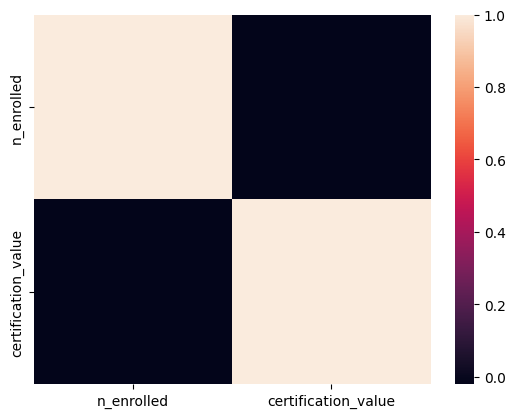

In [1263]:
sns.heatmap(edx_dropnull[['n_enrolled', 'certification_value', ]].corr())
plt.show()

In [1264]:
edx_dropnull.course_length.value_counts()

6 Weeks     173
4 Weeks     159
5 Weeks     119
7 Weeks      83
10 Weeks     79
8 Weeks      77
12 Weeks     34
3 Weeks      26
9 Weeks      20
15 Weeks     18
2 Weeks      16
14 Weeks     15
16 Weeks     12
1 Weeks       7
11 Weeks      6
13 Weeks      6
18 Weeks      3
17 Weeks      1
Name: course_length, dtype: int64

In [1265]:
edx_dropnull.course_length =  edx_dropnull.course_length.str.strip('Weeks')

/tmp/ipykernel_119207/2363731216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_dropnull.course_length =  edx_dropnull.course_length.str.strip('Weeks')


In [1266]:
lenint = edx_dropnull.course_length.astype(int)

In [1267]:
edx_dropnull.course_length = lenint
edx_dropnull

/tmp/ipykernel_119207/2466155175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_dropnull.course_length = lenint


,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,certification_value,z_score
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online,49,-0.094358
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...,49,-0.094358
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...,90,-0.072673
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge,199,-0.015023
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...,249,0.011422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,StudioX: Creating a Course with edX Studio,Learn the fundamentals of creating courses on ...,20355,Self-paced on your time,edX,Nina Huntemann-Ben Piscopo,Introductory,Education & Teacher Training,English,English,4–6 hours per week,3,FREE-Add a Verified Certificate for $99 USD,"In this course, we will introduce you to edX S...",NaN,https://www.edx.org/course/studiox-creating-a-...,99,-0.067913
966,Introducción a las ondas gravitacionales,"En este curso, junto con la Dra. Gabriela Gonz...",8657,Self-paced on your time,Universidad Nacional de Córdoba,Gabriela González,Introductory,Science,Español,"English, Español",5–7 hours per week,4,FREE-Add a Verified Certificate for $50 USD,En este curso conocerás sobre las ondas gravit...,Introducción: En este curso vamos a hablar de ...,https://www.edx.org/course/introduccion-a-las-...,50,-0.093829
969,Global China: From the Mongols to the Ming,Explore the impact of the conquest dynasties a...,41902,Self-paced on your time,Harvard University,Peter K. Bol-William C. Kirby,Introductory,History,English,"English, 中文",1–3 hours per week,15,FREE-Add a Verified Certificate for $139 USD,"In the 13th century, by force of arms, the Mon...",NaN,https://www.edx.org/course/global-china-from-t...,139,-0.046757
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...

In [1268]:
edx_dropnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 854 entries, 0 to 973
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                854 non-null    object 
 1   summary              805 non-null    object 
 2   n_enrolled           854 non-null    int64  
 3   course_type          854 non-null    object 
 4   institution          854 non-null    object 
 5   instructors          851 non-null    object 
 6   Level                854 non-null    object 
 7   subject              854 non-null    object 
 8   language             854 non-null    object 
 9   subtitles            851 non-null    object 
 10  course_effort        854 non-null    object 
 11  course_length        854 non-null    int64  
 12  price                854 non-null    object 
 13  course_description   821 non-null    object 
 14  course_syllabus      363 non-null    object 
 15  course_url           854 non-null    obj

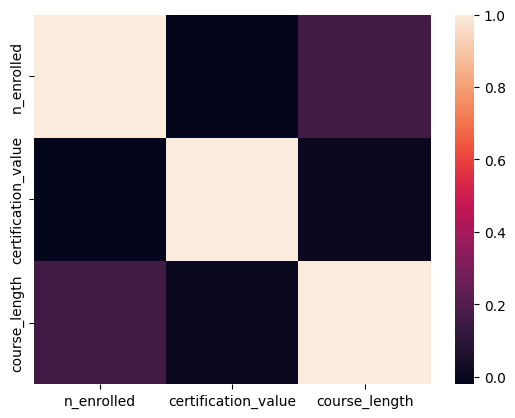

In [1269]:
sns.heatmap(edx_dropnull[['n_enrolled', 'certification_value','course_length' ]].corr())
plt.show()

In [1270]:
edx_dummies =pd.get_dummies(edx_dropnull, columns=['language','subject'])

In [1271]:
edx_dummies.columns

Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subtitles', 'course_effort', 'course_length',
       'price', 'course_description', 'course_syllabus', 'course_url',
       'certification_value', 'z_score', 'language_Deutsch',
       'language_English', 'language_Español', 'language_Français',
       'language_Italiano', 'language_Português', 'language_中文',
       'language_日本語', 'subject_Architecture', 'subject_Art & Culture',
       'subject_Biology & Life Sciences', 'subject_Business & Management',
       'subject_Chemistry', 'subject_Communication',
       'subject_Computer Science', 'subject_Data Analysis & Statistics',
       'subject_Design', 'subject_Economics & Finance',
       'subject_Education & Teacher Training', 'subject_Electronics',
       'subject_Energy & Earth Sciences', 'subject_Engineering',
       'subject_Environmental Studies', 'subject_Ethics',
       'subject_Food & Nutrition', 'subject_Health & Safety',
  

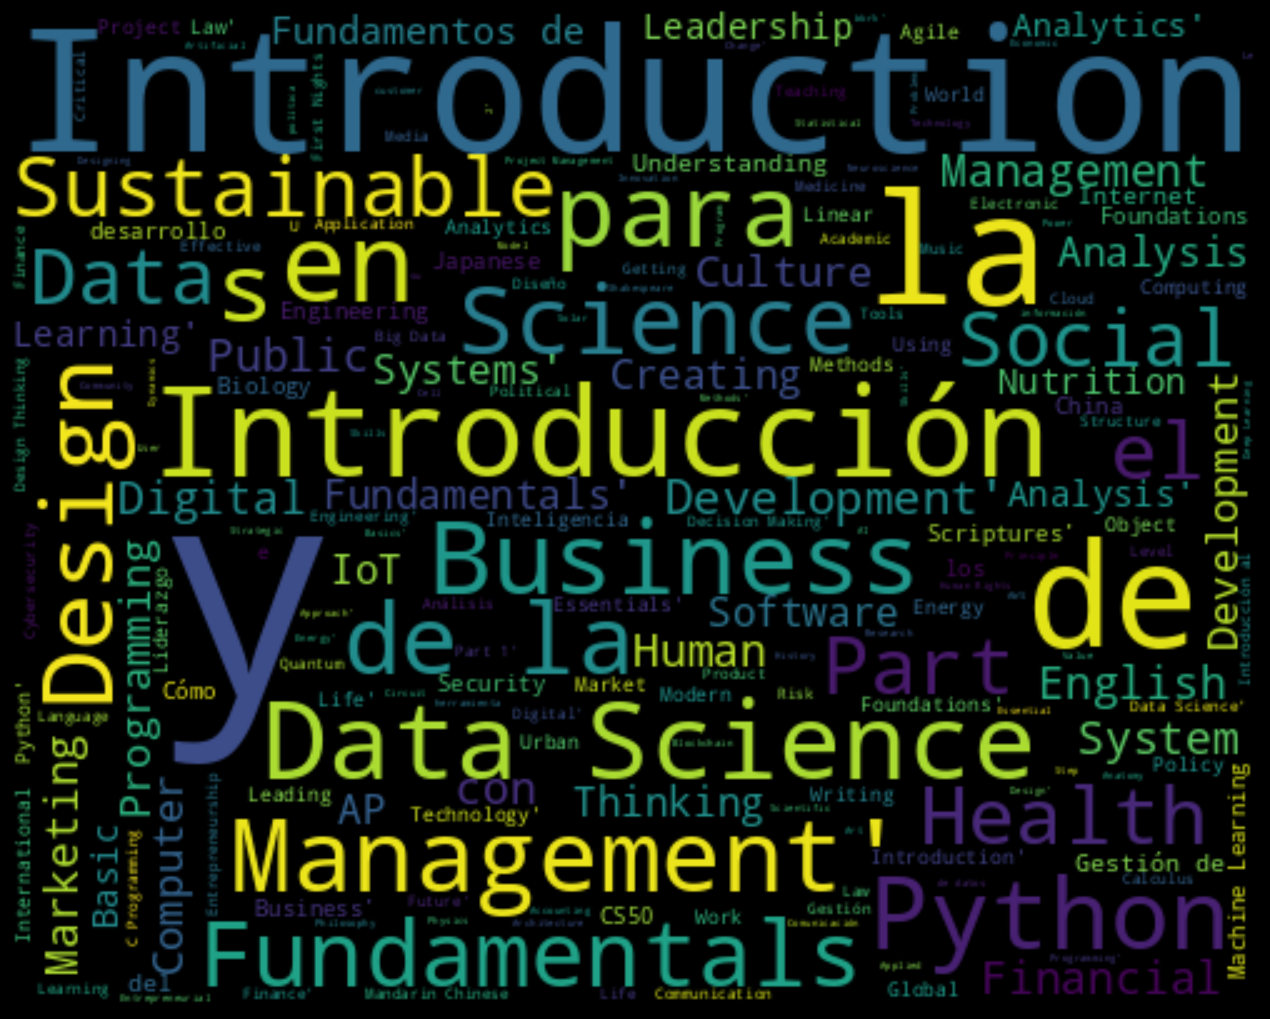

In [1272]:
text = edx_dummies.title.values
wordcloud = WordCloud(
    width = 500,
    height = 400,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [1273]:
edx_dummies['Level']= edx_dummies['Level'].astype('category')

In [1274]:
edx_dummies['Level_cat'] = edx_dummies['Level'].cat.codes
edx_dummies.head(2)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subtitles,course_effort,course_length,...,subject_Law,subject_Literature,subject_Math,subject_Medicine,subject_Music,subject_Philosophy & Ethics,subject_Physics,subject_Science,subject_Social Sciences,Level_cat
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,English,2–3 hours per week,2,...,0,0,0,0,0,0,0,0,0,2
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,English,2–4 hours per week,7,...,0,0,0,0,0,0,0,0,0,2


In [1275]:
edx_dummies[['Level', 'Level_cat']]

,Level,Level_cat
0,Introductory,2
1,Introductory,2
2,Introductory,2
3,Intermediate,1
4,Introductory,2
...,...,...
964,Introductory,2
966,Introductory,2
969,Introductory,2
972,Advanced,0


In [1276]:
edx_dummies.Level_cat.info()

<class 'pandas.core.series.Series'>
Int64Index: 854 entries, 0 to 973
Series name: Level_cat
Non-Null Count  Dtype
--------------  -----
854 non-null    int8 
dtypes: int8(1)
memory usage: 7.5 KB


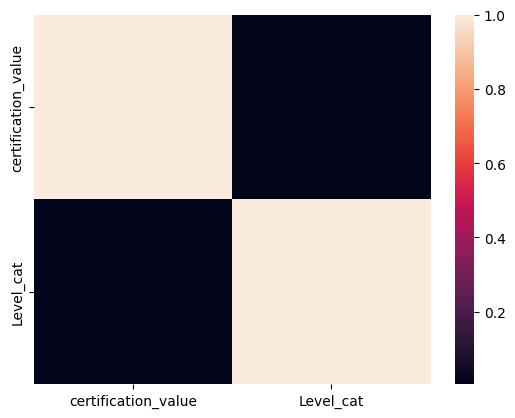

In [1277]:
sns.heatmap(edx_dummies[['certification_value','Level_cat']].corr())
plt.show()

/home/monica/moocs_data_analysis/.venv/lib64/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.draw()
/home/monica/moocs_data_analysis/.venv/lib64/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.draw()
/home/monica/moocs_data_analysis/.venv/lib64/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.draw()
/home/monica/moocs_data_analysis/.venv/lib64/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.draw()
/home/monica/moocs_data_analysis/.venv/lib64/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  fig.canvas.draw()
/home/monica/moocs_d

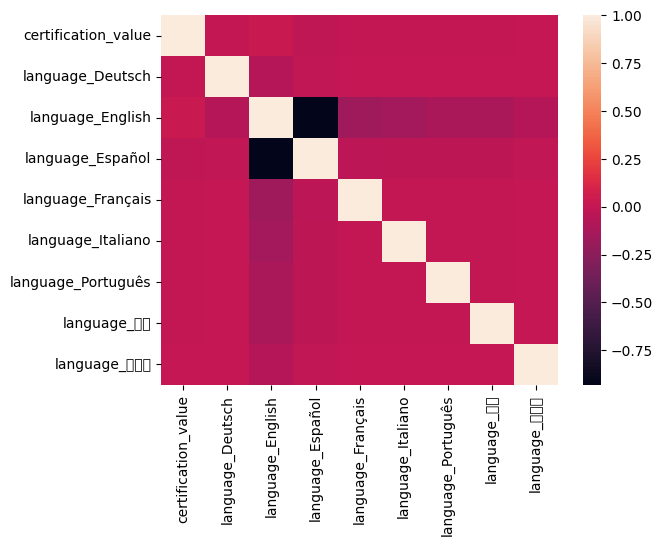

In [1278]:
sns.heatmap(edx_dummies[['certification_value', 'language_Deutsch',
       'language_English', 'language_Español', 'language_Français',
       'language_Italiano', 'language_Português', 'language_中文',
       'language_日本語']].corr())
plt.show()

/home/monica/moocs_data_analysis/.venv/lib64/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.draw()
/home/monica/moocs_data_analysis/.venv/lib64/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.draw()
/home/monica/moocs_data_analysis/.venv/lib64/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/monica/moocs_data_analysis/.venv/lib64/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


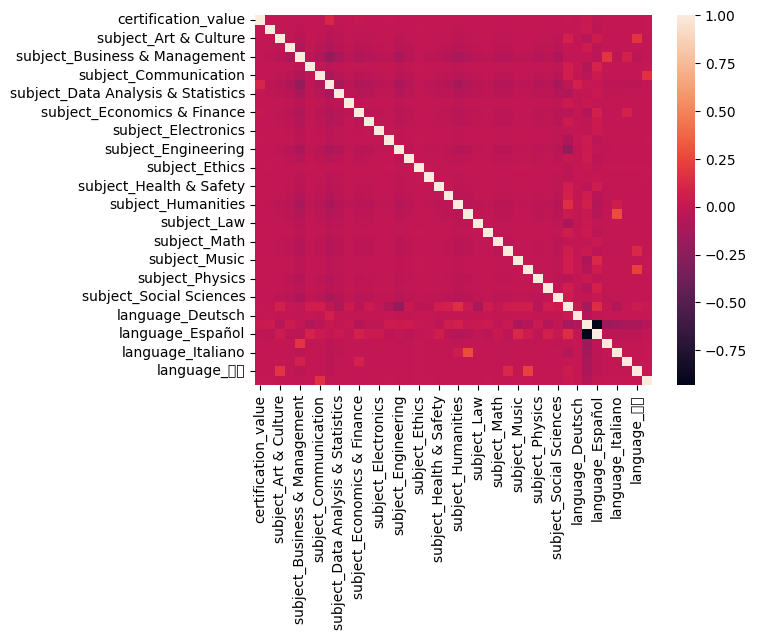

In [1279]:
sns.heatmap(edx_dummies[['certification_value','subject_Architecture', 'subject_Art & Culture',
       'subject_Biology & Life Sciences', 'subject_Business & Management',
       'subject_Chemistry', 'subject_Communication',
       'subject_Computer Science', 'subject_Data Analysis & Statistics',
       'subject_Design', 'subject_Economics & Finance',
       'subject_Education & Teacher Training', 'subject_Electronics',
       'subject_Energy & Earth Sciences', 'subject_Engineering',
       'subject_Environmental Studies', 'subject_Ethics',
       'subject_Food & Nutrition', 'subject_Health & Safety',
       'subject_History', 'subject_Humanities', 'subject_Language',
       'subject_Law', 'subject_Literature', 'subject_Math', 'subject_Medicine',
       'subject_Music', 'subject_Philosophy & Ethics', 'subject_Physics',
       'subject_Science', 'subject_Social Sciences', 'Level_cat', 'language_Deutsch',
       'language_English', 'language_Español', 'language_Français',
       'language_Italiano', 'language_Português', 'language_中文',
       'language_日本語']].corr())
plt.show()

In [1280]:
edx_dummies.columns

Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subtitles', 'course_effort', 'course_length',
       'price', 'course_description', 'course_syllabus', 'course_url',
       'certification_value', 'z_score', 'language_Deutsch',
       'language_English', 'language_Español', 'language_Français',
       'language_Italiano', 'language_Português', 'language_中文',
       'language_日本語', 'subject_Architecture', 'subject_Art & Culture',
       'subject_Biology & Life Sciences', 'subject_Business & Management',
       'subject_Chemistry', 'subject_Communication',
       'subject_Computer Science', 'subject_Data Analysis & Statistics',
       'subject_Design', 'subject_Economics & Finance',
       'subject_Education & Teacher Training', 'subject_Electronics',
       'subject_Energy & Earth Sciences', 'subject_Engineering',
       'subject_Environmental Studies', 'subject_Ethics',
       'subject_Food & Nutrition', 'subject_Health & Safety',
  

<AxesSubplot: xlabel='certification_value', ylabel='language_中文'>

/home/monica/moocs_data_analysis/.venv/lib64/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  func(*args, **kwargs)
/home/monica/moocs_data_analysis/.venv/lib64/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  func(*args, **kwargs)
/home/monica/moocs_data_analysis/.venv/lib64/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/monica/moocs_data_analysis/.venv/lib64/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


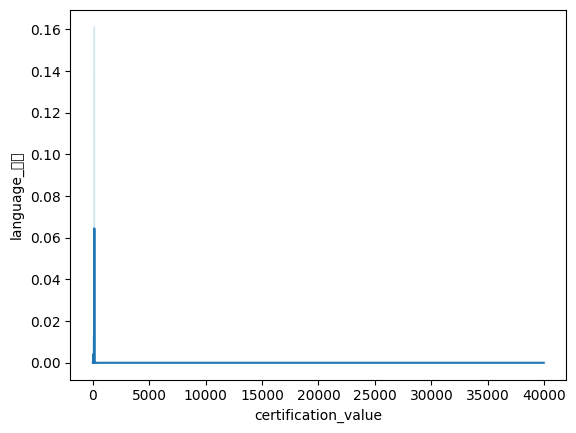

In [1281]:
sns.lineplot(data=edx_dummies, x="certification_value", y="language_中文")

In [1282]:
edx_dummies[['certification_value', 'n_enrolled']].value_counts()

certification_value  n_enrolled
5                    6238          1
100                  44669         1
119                  19687         1
                     24618         1
125                  16013         1
                                  ..
49                   69413         1
                     74060         1
                     75310         1
                     78704         1
39960                6388          1
Length: 854, dtype: int64